# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [104]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [105]:
#A) seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


**To do
1) Preencher com media ou mediana, a idade e preservar os dados
2) Covnerter Renda(Income) de object para Float

In [106]:
media_age = df['Age'].mode().iloc[0]
df['Age'] = df['Age'].fillna(media_age)

df['Income'] = df['Income'].str.replace('.', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '.', regex=False)
df['Income'] = df['Income'].astype(float)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [107]:
#seu código aqui - já foi feito em cima

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [108]:
#seu código aqui
colunas_texto = df.select_dtypes(include='object').columns #Coloquei todas as colunas categoricas em uma variavel
for col in colunas_texto: 
    print(f"\nColuna:{col}")
    print("Valores Unicos:")
    print(df[col].value_counts())



Coluna:Gender
Valores Unicos:
Gender
Female    86
Male      78
Name: count, dtype: int64

Coluna:Education
Valores Unicos:
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

Coluna:Marital Status
Valores Unicos:
Marital Status
Married    87
Single     77
Name: count, dtype: int64

Coluna:Home Ownership
Valores Unicos:
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

Coluna:Credit Score
Valores Unicos:
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [109]:
#seu código aqui
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,34.914634,83765.243902,0.652439
std,9.113061,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,25.000000,57500.000000,0.000000
50%,33.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


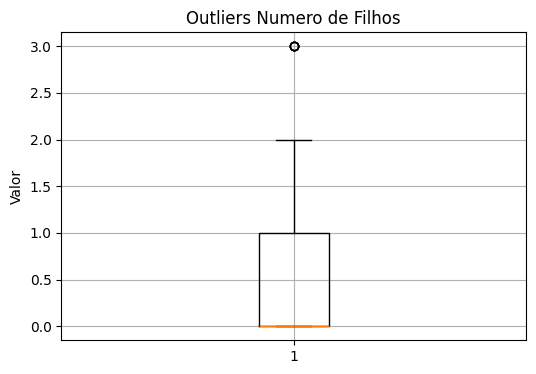

In [110]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Number of Children'])
plt.title("Outliers Numero de Filhos")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

Ver distribuição univariada categorica, Genero, educação, casa própria, estado civil 

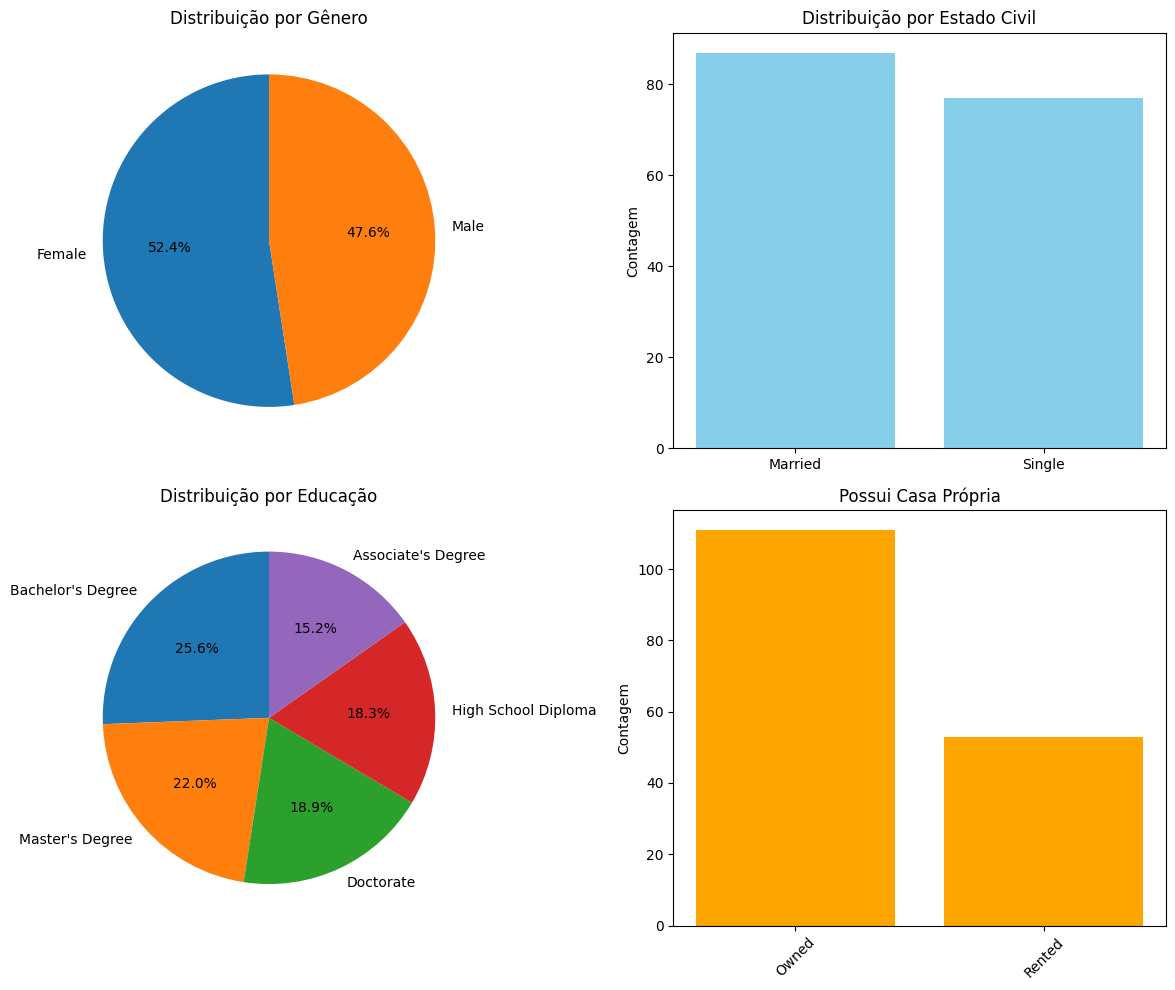

In [111]:
#seu código aqui


# Criando contagens (frequências) antes de plotar
genero_counts = df['Gender'].value_counts()
estado_civil_counts = df['Marital Status'].value_counts()
educacao_counts = df['Education'].value_counts()
casa_propria_counts = df['Home Ownership'].value_counts()

# Criando uma figura com 2 linhas e 2 colunas de gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Pizza - Gênero
axes[0, 0].pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribuição por Gênero')

# Gráfico 2: Barras - Estado Civil 
axes[0, 1].bar(estado_civil_counts.index, estado_civil_counts.values, color='skyblue')
axes[0, 1].set_title('Distribuição por Estado Civil')
axes[0, 1].set_ylabel('Contagem')

# Gráfico 3: Pizza - Educação
axes[1, 0].pie(educacao_counts, labels=educacao_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribuição por Educação')

# Gráfico 4: Barras - Casa Própria
axes[1, 1].bar(casa_propria_counts.index, casa_propria_counts.values, color='orange')
axes[1, 1].set_title('Possui Casa Própria')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylabel('Contagem')

# Ajusta o layout
plt.tight_layout()
plt.show()


**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

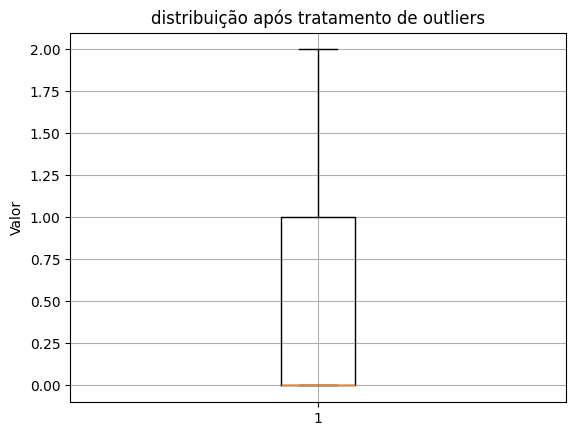

In [112]:
#seu código aqui

# Usando IQR
Q1 = df['Number of Children'].quantile(0.25)
Q3 = df['Number of Children'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['Number of Children'] >= limite_inferior) & (df['Number of Children'] <= limite_superior)]

plt.Figure(figsize=(4,4))
plt.boxplot(df_sem_outliers['Number of Children'])
plt.title('distribuição após tratamento de outliers')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil? 
    - Sim, acima de 40 anos a maioria é casado e abaixo de 34 a maioria é solteira.
*   Qual a relação entre o score de crédito e o nível de escolaridade? 
    - Quem possui apenas o ensino médio possui crédito baixo. 
*  O salário parece influenciar na idade? 
    - Sim, maiores sálarios são de pessoas mais velhas, principalmente acima de 40 anos. 
* O salário parece influenciar no Score de Crédito? 
    - Sim, Maiores salários possui créditos maiores.
* Clientes com casa própria tendem a ter um score mais alto?
    - Sim, a maioria dos proprietários de casa, possui créditos maiores.



In [113]:
# Relação entre Score e Grau de escolaridade.

# Agrupamento e cálculo das proporções
score_education = (
    df_sem_outliers
    .groupby('Credit Score')['Education']
    .value_counts(normalize=True)
    .rename('Proporcao')              # Nomeia a coluna de proporção
    .reset_index()
)


# Gráfico de barras com Plotly
fig = px.bar(
    score_education,
    x='Credit Score',
    y='Proporcao',
    color='Education',
    barmode='group',
    title='Relação entre Score e Grau de Escolaridade'
)
fig.show()


**Análise** Aqui percebemos que para que tem apenas o ensino médio possui o score é baixo com mais frequencia.

In [114]:
# Relação entre Idade e Estado Civíl

idade_civil = (
    df_sem_outliers
    .groupby('Age')['Marital Status']
    .value_counts(normalize=True)
    .rename('Proporção')
    .reset_index()
)

fig = px.bar(
    idade_civil,
    x='Age',
    y='Proporção',
    color='Marital Status',
    barmode='group',
    title='Relação entre idade com estado cívil'
)

fig.show()

**Analise** - Aqui no gráfico percebemos que de 25 a 34 a maioria é solteiro(a) e a partir de 45 anos a maioria é casada. 

In [115]:
#Relaçao entre Salário e Idade
salario_idade = (
    df_sem_outliers
    .groupby('Age')['Income']
    .value_counts(normalize=True)
    .rename('Proporção')
    .reset_index()
)

fig = px.bar(
    salario_idade,
    x='Age',
    y='Proporção',
    title='Relação entre Salario e Idade',
    color='Income',
    barmode='group',
    labels={
        'Income':'Sálario'
    }
)
fig.show()

**Análise** - Pelo gráfico percebemos que a partir dos 40 anos de idade os salarios tendem a ser maiores e a partir dos 50 anos 
temos outra alta de salários

In [116]:
# Relação entre Salario e Score 
salario_score = (
    df_sem_outliers
    .groupby('Credit Score')['Income']
    .value_counts(normalize=True)
    .rename('Proporção')
    .reset_index()

)

fig = px.bar(
    salario_score,
    x='Credit Score',
    y='Proporção',
    title='Relação entre Salario e Score',
    color='Income',
    labels={'Income':'Salário'},
    barmode='group'

)

fig.show()

**Análise** - Aqui percebemos que salarios mais altos possui o um crédito maior.

In [117]:
# Relação entre proprietários da sua residencia e score
score_casa = (
    df_sem_outliers
    .groupby('Credit Score')['Home Ownership']
    .value_counts(normalize=True)
    .rename('Proporção')
    .reset_index()
)

fig = px.bar(
    score_casa,
    x='Credit Score',
    y='Proporção',
    title='Relação entre Propiétario de cada própria e Score',
    color='Home Ownership',
    barmode='group'

)

fig.show()

**Ánalise** - Aqui precebemos um forte relação onde a maioria dos proprietários de casa possui crédito alto.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [118]:
# seu código aqui
status_score = (
    df_sem_outliers
    .groupby('Credit Score')['Marital Status']
    .value_counts(normalize=True)
    .rename('Proporção')
    .reset_index()
)

fig = px.bar(
    status_score,
    x='Credit Score',
    y='Proporção',
    title='Relação Score com Estado Cívil',
    color='Marital Status',
    barmode='group'
    
)

fig.show()

**Análise** - Aqui conseguimos ver que Casados possui créditos altos.

In [119]:
gender_score = (
    df_sem_outliers
    .groupby('Credit Score')['Gender']
    .value_counts(normalize=True)
    .rename('Proporção')
    .reset_index()
)

fig = px.bar(
    gender_score,
    x='Credit Score',
    y='Proporção',
    title='Relação entre Genero e Score',
    barmode='group',
    color='Gender'
)

fig.show()

**Análise** - Aqui percebemos que crédito baixo é 100% Feminino. 

In [120]:
score_low = df_sem_outliers[df_sem_outliers['Credit Score'] == 'Low']

gender_status = (
    score_low
    .groupby('Marital Status')['Gender']
    .value_counts(normalize=True)
    .rename('Proporção')
    .reset_index()
)

fig = px.bar(
    gender_status,
    x='Marital Status',
    y='Proporção',
    color='Gender',
    barmode='group',
    title='Relação entre Genero e Estado Cívil'
)

fig.show()

**Ánalise** Aqui quis analisar dentro do Score baixo onde a maioria é do gênero feminino, quais eram o estado cívil, e 
percebi que 100% era solteira.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [121]:
#seu código aqui

# Calculando a correlação
correlacao = df_sem_outliers.corr(numeric_only=True)

# Transformando a correlação em formato "long" para plotar
correlacao_long = correlacao.reset_index().melt(id_vars='index')
correlacao_long.columns = ['Variavel1', 'Variavel2', 'Correlacao']

# Plotando com plotly
fig = px.imshow(
    correlacao.values,
    labels=dict(x="Variáveis", y="Variáveis", color="Correlação"),
    x=correlacao.columns,
    y=correlacao.columns,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1
)
fig.update_layout(title='Mapa de Correlação Interativo')
fig.show()



**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [122]:
# sua justificativa aqui
# Sim, já havia percebido um certa relação entre idade e salários, onde pessoas mais velhas tendem a ter saláios maiores 
#

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [123]:
#seu código aqui
# atribuí as colunas catgoricas em uma variavel.
colunas_categoricas = df_sem_outliers.select_dtypes(include='object').columns

# Aplicando o One Hot encoding, agora nao existe mais colunas categoricas na variavel "df_encoded"
df_encoded = pd.get_dummies(df_sem_outliers, columns=colunas_categoricas, drop_first=True)
print(df_encoded)

      Age    Income  Number of Children  Gender_Male  \
0    25.0   50000.0                   0        False   
1    30.0  100000.0                   2         True   
2    35.0   75000.0                   1        False   
3    40.0  125000.0                   0         True   
5    50.0  150000.0                   0         True   
..    ...       ...                 ...          ...   
159  29.0   27500.0                   0        False   
160  34.0   47500.0                   0         True   
161  39.0   62500.0                   2        False   
162  44.0   87500.0                   0         True   
163  49.0   77500.0                   1        False   

     Education_Bachelor's Degree  Education_Doctorate  \
0                           True                False   
1                          False                False   
2                          False                 True   
3                          False                False   
5                          False          

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [124]:
#seu código aqui


# Calculando a correlação
correlacao = df_encoded.corr(numeric_only=True)

# Plotando com plotly
fig = px.imshow(
    correlacao.values,
    labels=dict(x="Variáveis", y="Variáveis", color="Correlação"),
    x=correlacao.columns,
    y=correlacao.columns,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1
)

# Ajustes de layout
fig.update_layout(
    title='Mapa de Correlação Interativo',
    width=1000,
    height=800,
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10))
)

fig.show()


**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [125]:
#seu código aqui

from sklearn.model_selection import train_test_split

X = df_encoded.drop('Credit Score_High', axis=1) #Exclui a coluna que irei fazer o teste preditório IA
y = df_encoded['Credit Score_High'] # O Alvo que queremos aplicar IA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test: ", y_test.shape)


Shape X_train: (127, 11)
Shape X_test:  (32, 11)
Shape y_train: (127,)
Shape y_test:  (32,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

In [126]:
#seu código aqui  - deixar os dados proporcionais.

# Contagem e proporção
score_counts = df_sem_outliers['Credit Score'].value_counts(normalize=True).reset_index()
score_counts.columns = ['Credit Score', 'Proporcao']


# Gráfico
fig = px.bar(
    score_counts,
    x='Credit Score',
    y='Proporcao',
    text='Proporcao', # mostra valores numericos em cima de cada barra
    color='Credit Score', #Atribui core pra cada valor e exibi uma tabela no gráfico
    title='Distribuição do Score de Crédito'
)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside') # formata os valores como porcentagem com 2 casas decimais & Coloca valores pra fora da barra
fig.update_layout(yaxis_tickformat='.0%', yaxis_title='Proporção') # Formata o eixo Y em porcentagem e renomeia o eixo y em Proporção
fig.show()


**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [127]:
#seu código aqui

from imblearn.over_sampling import SMOTE
from collections import Counter

# Verificando o balanceamento antes
print("Antes do SMOTE:", Counter(y_train))

# Criando o objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicando o SMOTE na base de treino
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificando o balanceamento após o SMOTE
print("Após o SMOTE:", Counter(y_train_bal))  


Antes do SMOTE: Counter({True: 87, False: 40})
Após o SMOTE: Counter({True: 87, False: 87})
